In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree


In [90]:
pats = pd.read_csv('Data - Parkinsons.csv')
pats.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [49]:
pats = pats.drop(['name'],axis=1)
pats.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [50]:
pats.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [51]:
pats.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Reading of Data #
There are 195 data points. from 32 patients. Some have 7 recordings others have 6 recordings. 8 patients, each having 6 recordings do not have parkinsons.

Should i treat each record as individual cases? Or average it out?

Most independent variables are float64 and are continious in nature.

No Null values.



## Challenges ##

There are very large numbers and very small decimals. for example MDP:Fo, Fhi, Flo is all in hundreds. MDVP Jitter in millions of a 1.  Will need to do data normalization/scalling.
There is one negative value. (Spread 1)

Too many features. Would need to select ones which make the most sense.




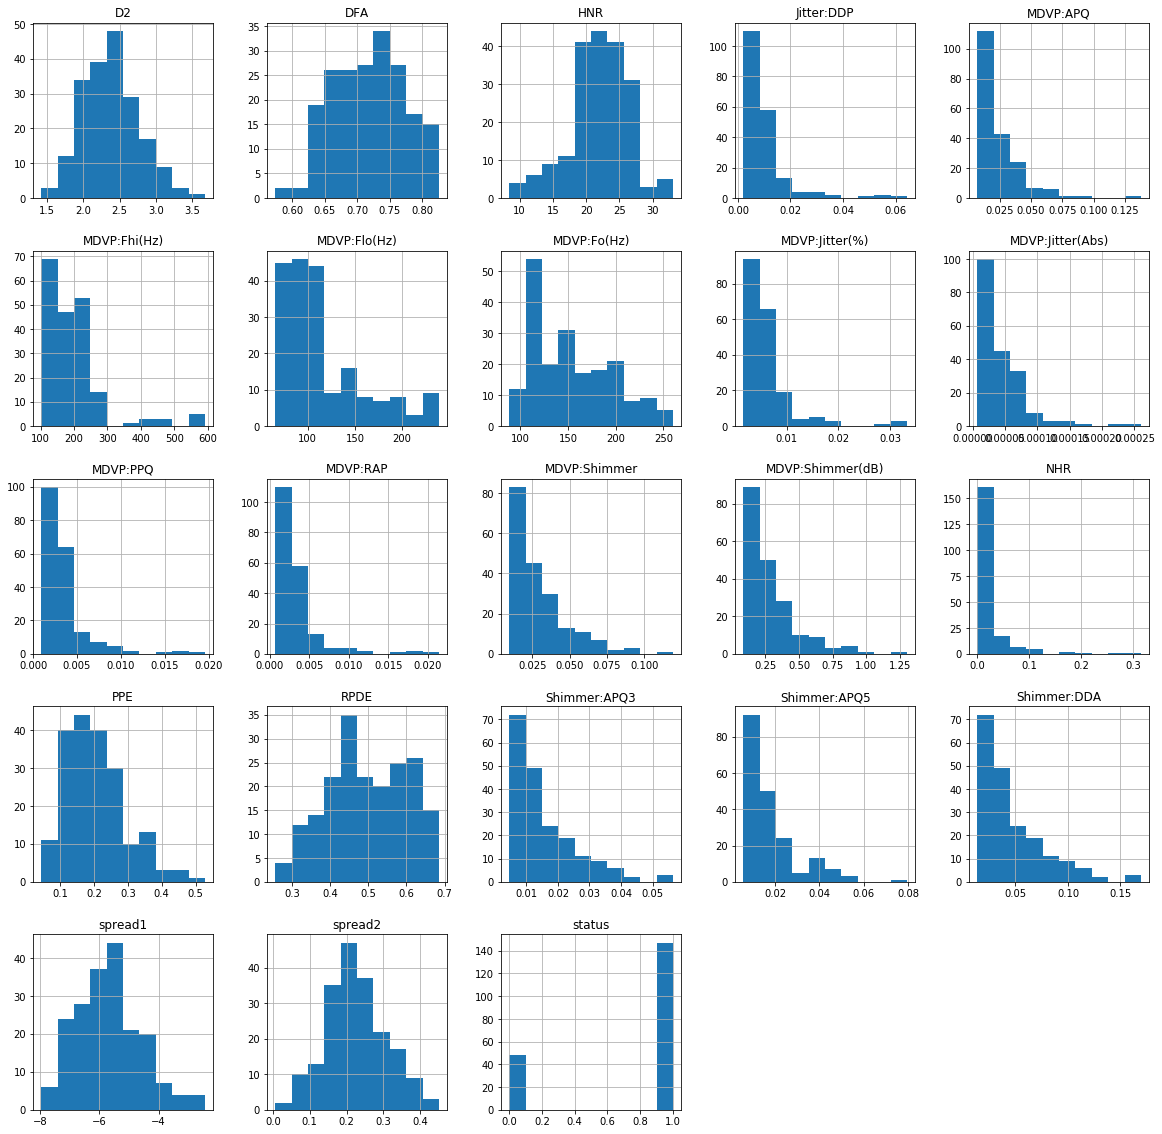

In [52]:
pats.hist(figsize=(20,20))
plt.show()

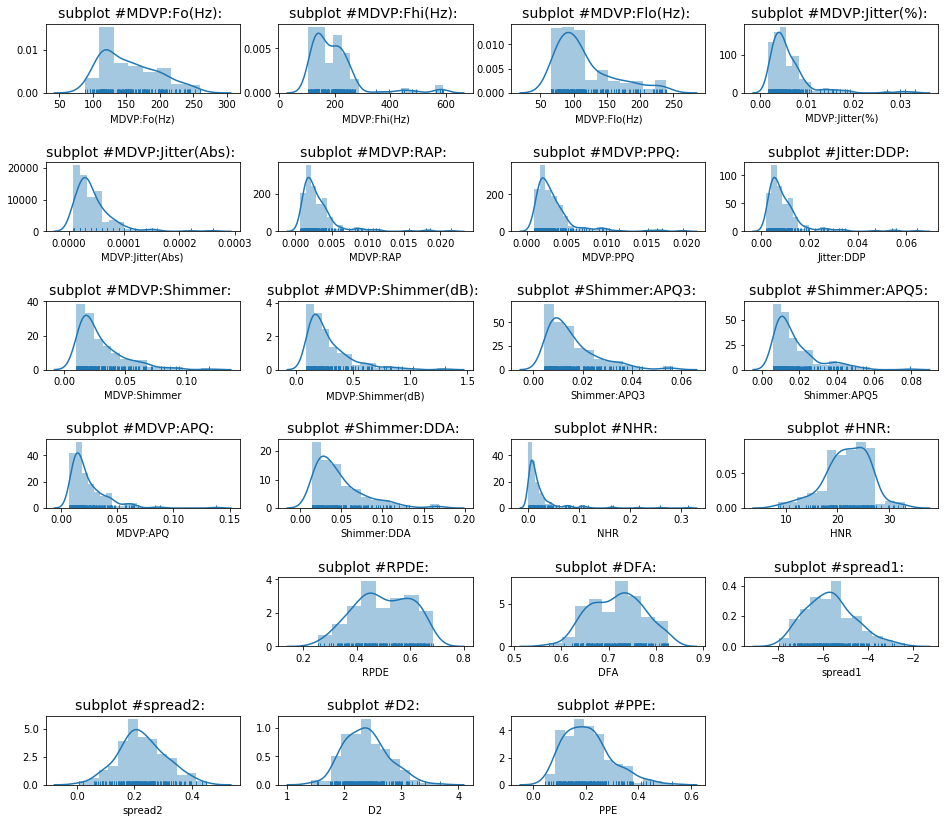

In [53]:
fig = plt.figure(figsize=(16,14))
fig.subplots_adjust(hspace=1)
#fig.tight_layout(h_pad=100.0, w_pad=100.0)
for i,cols in enumerate(pats.columns):
    if cols != 'status':
        fig.add_subplot(6,4,i+1)
        plt.title('subplot #{}: '.format(cols), fontsize=14)
        sns.distplot(pats[cols], kde=True, rug=True, norm_hist=True)

## Observations from Distplot ##

MDVP-FHi - also seems to have a tail.
MDVP-Jitter, RAP, PPQ, Shimmer, Shimmer(dB) have long tails. and have very similar distribution. How are they related to each other? Can some of them be eliminated? 
NHR - Has a spike at about 0.02 and then drops of rapidly. has a really long tails. Who does the tail coorelate to?
Spread 2, D2 seems normally distributed? 
Spread 1, RDPE, DFA - approx normal distribution. What impact does it have?

MDVP Frequency measures - Fo and Flo have a wide distribution which cannot neccesarily be termed as tails.
However MDVP-FHi - Seem to have a long tails. i.e. lot of outliers.



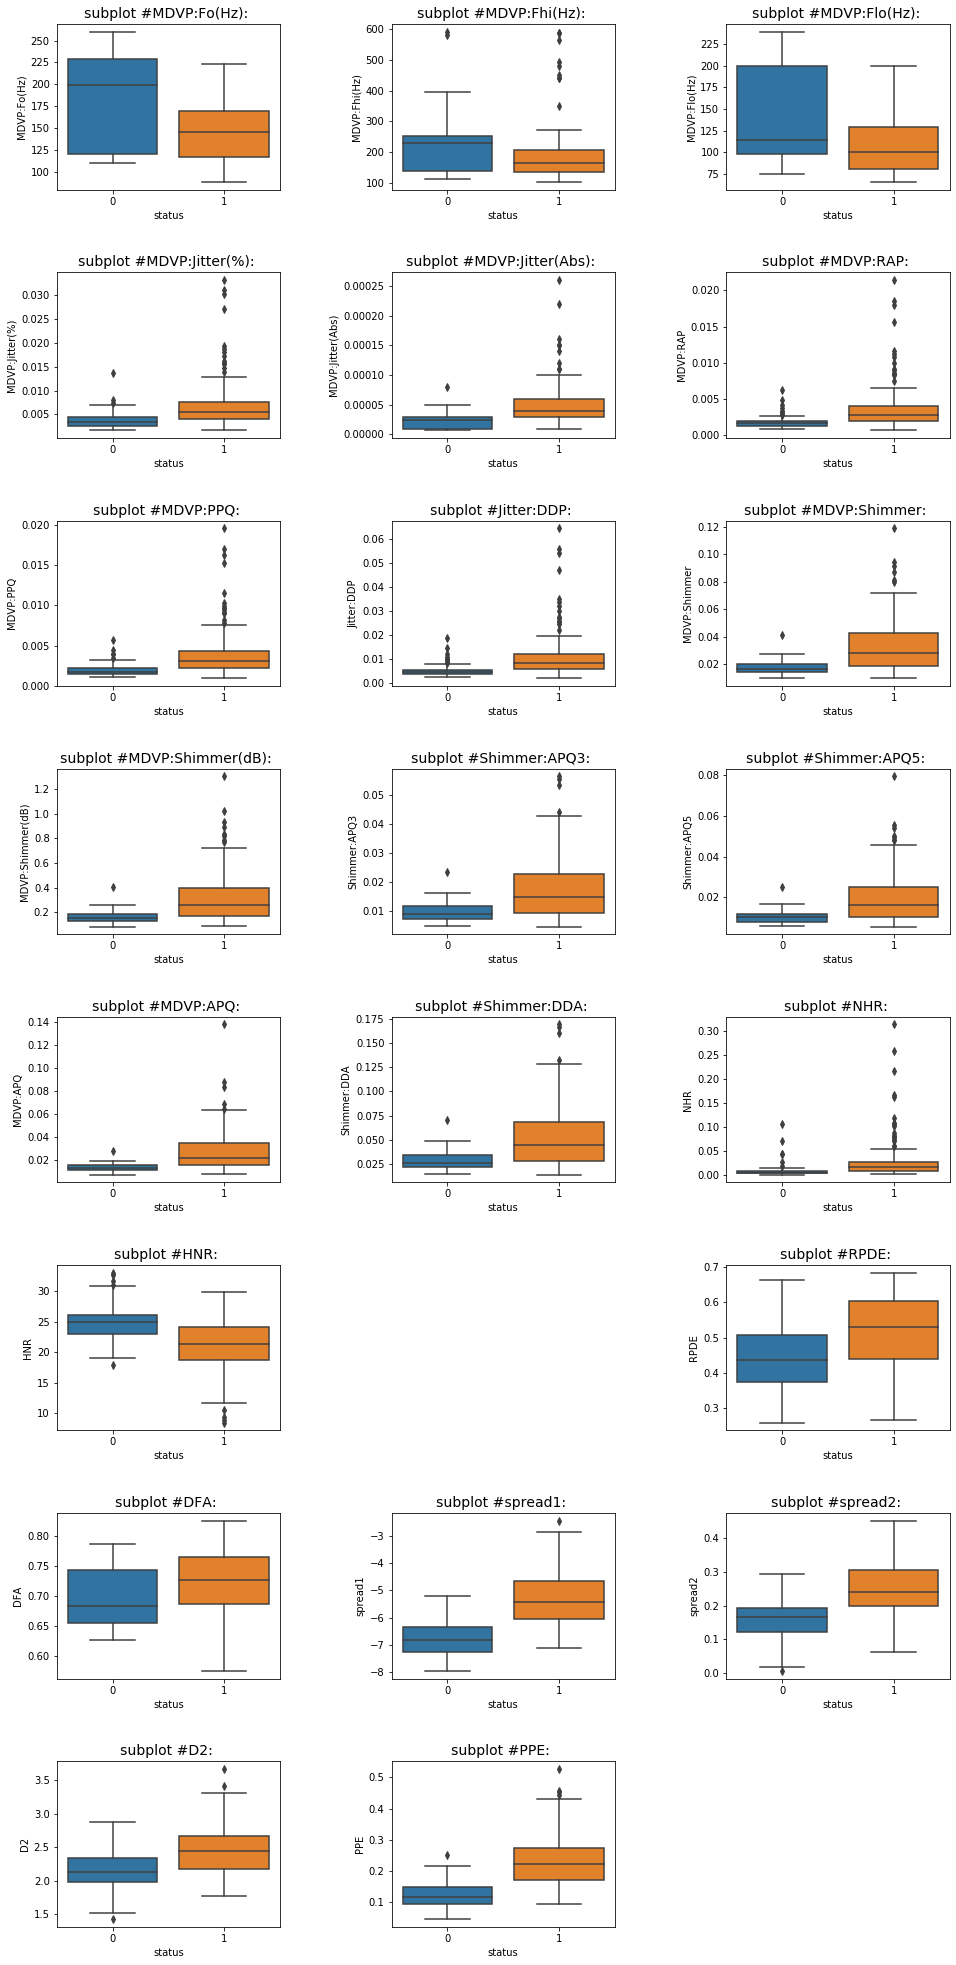

In [54]:
fig = plt.figure(figsize=(16,35))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
#fig.tight_layout(h_pad=100.0, w_pad=100.0)
for i,cols in enumerate(pats.columns):
    if cols != 'status':
        fig.add_subplot(8,3,i+1)
        plt.title('subplot #{}: '.format(cols), fontsize=14)
        sns.boxplot(pats.status,pats[cols])


## Observations from Box Plot ##
As expected, the ones with long tails have a lot of outliers
Most telling is the MDVP Fo - The variation/range in pitch/frequency for ones without parkinson is much lower than ones with parkinson. Mean is also lower
MDVP-FHi - the ones with parkinson have a lot of outliers. This will probably confuse the algorighm. Should we eliminate it?
MDVP-Flo seems good. But how we account for range (and not absolute value in an algorithm?

MDVP Jitter%, Jitter, Shimmer, Shimmer(dB) seem to give a good indication of PArkinson. People with parkinson have higher the jitter/shimmer.

There multiple measuresments of jitter and shimmer. They give a similar indication. Can we eliminate all but one of each category from the algorithm?

PPE, spread and spread 2 also seem to be a good indication. 

### Can be eliminated? ###
DFA, RDPE - doesnt seem to be good indication - we can only say those with Parkinson have a large range of DFA. Should probably be eliminated








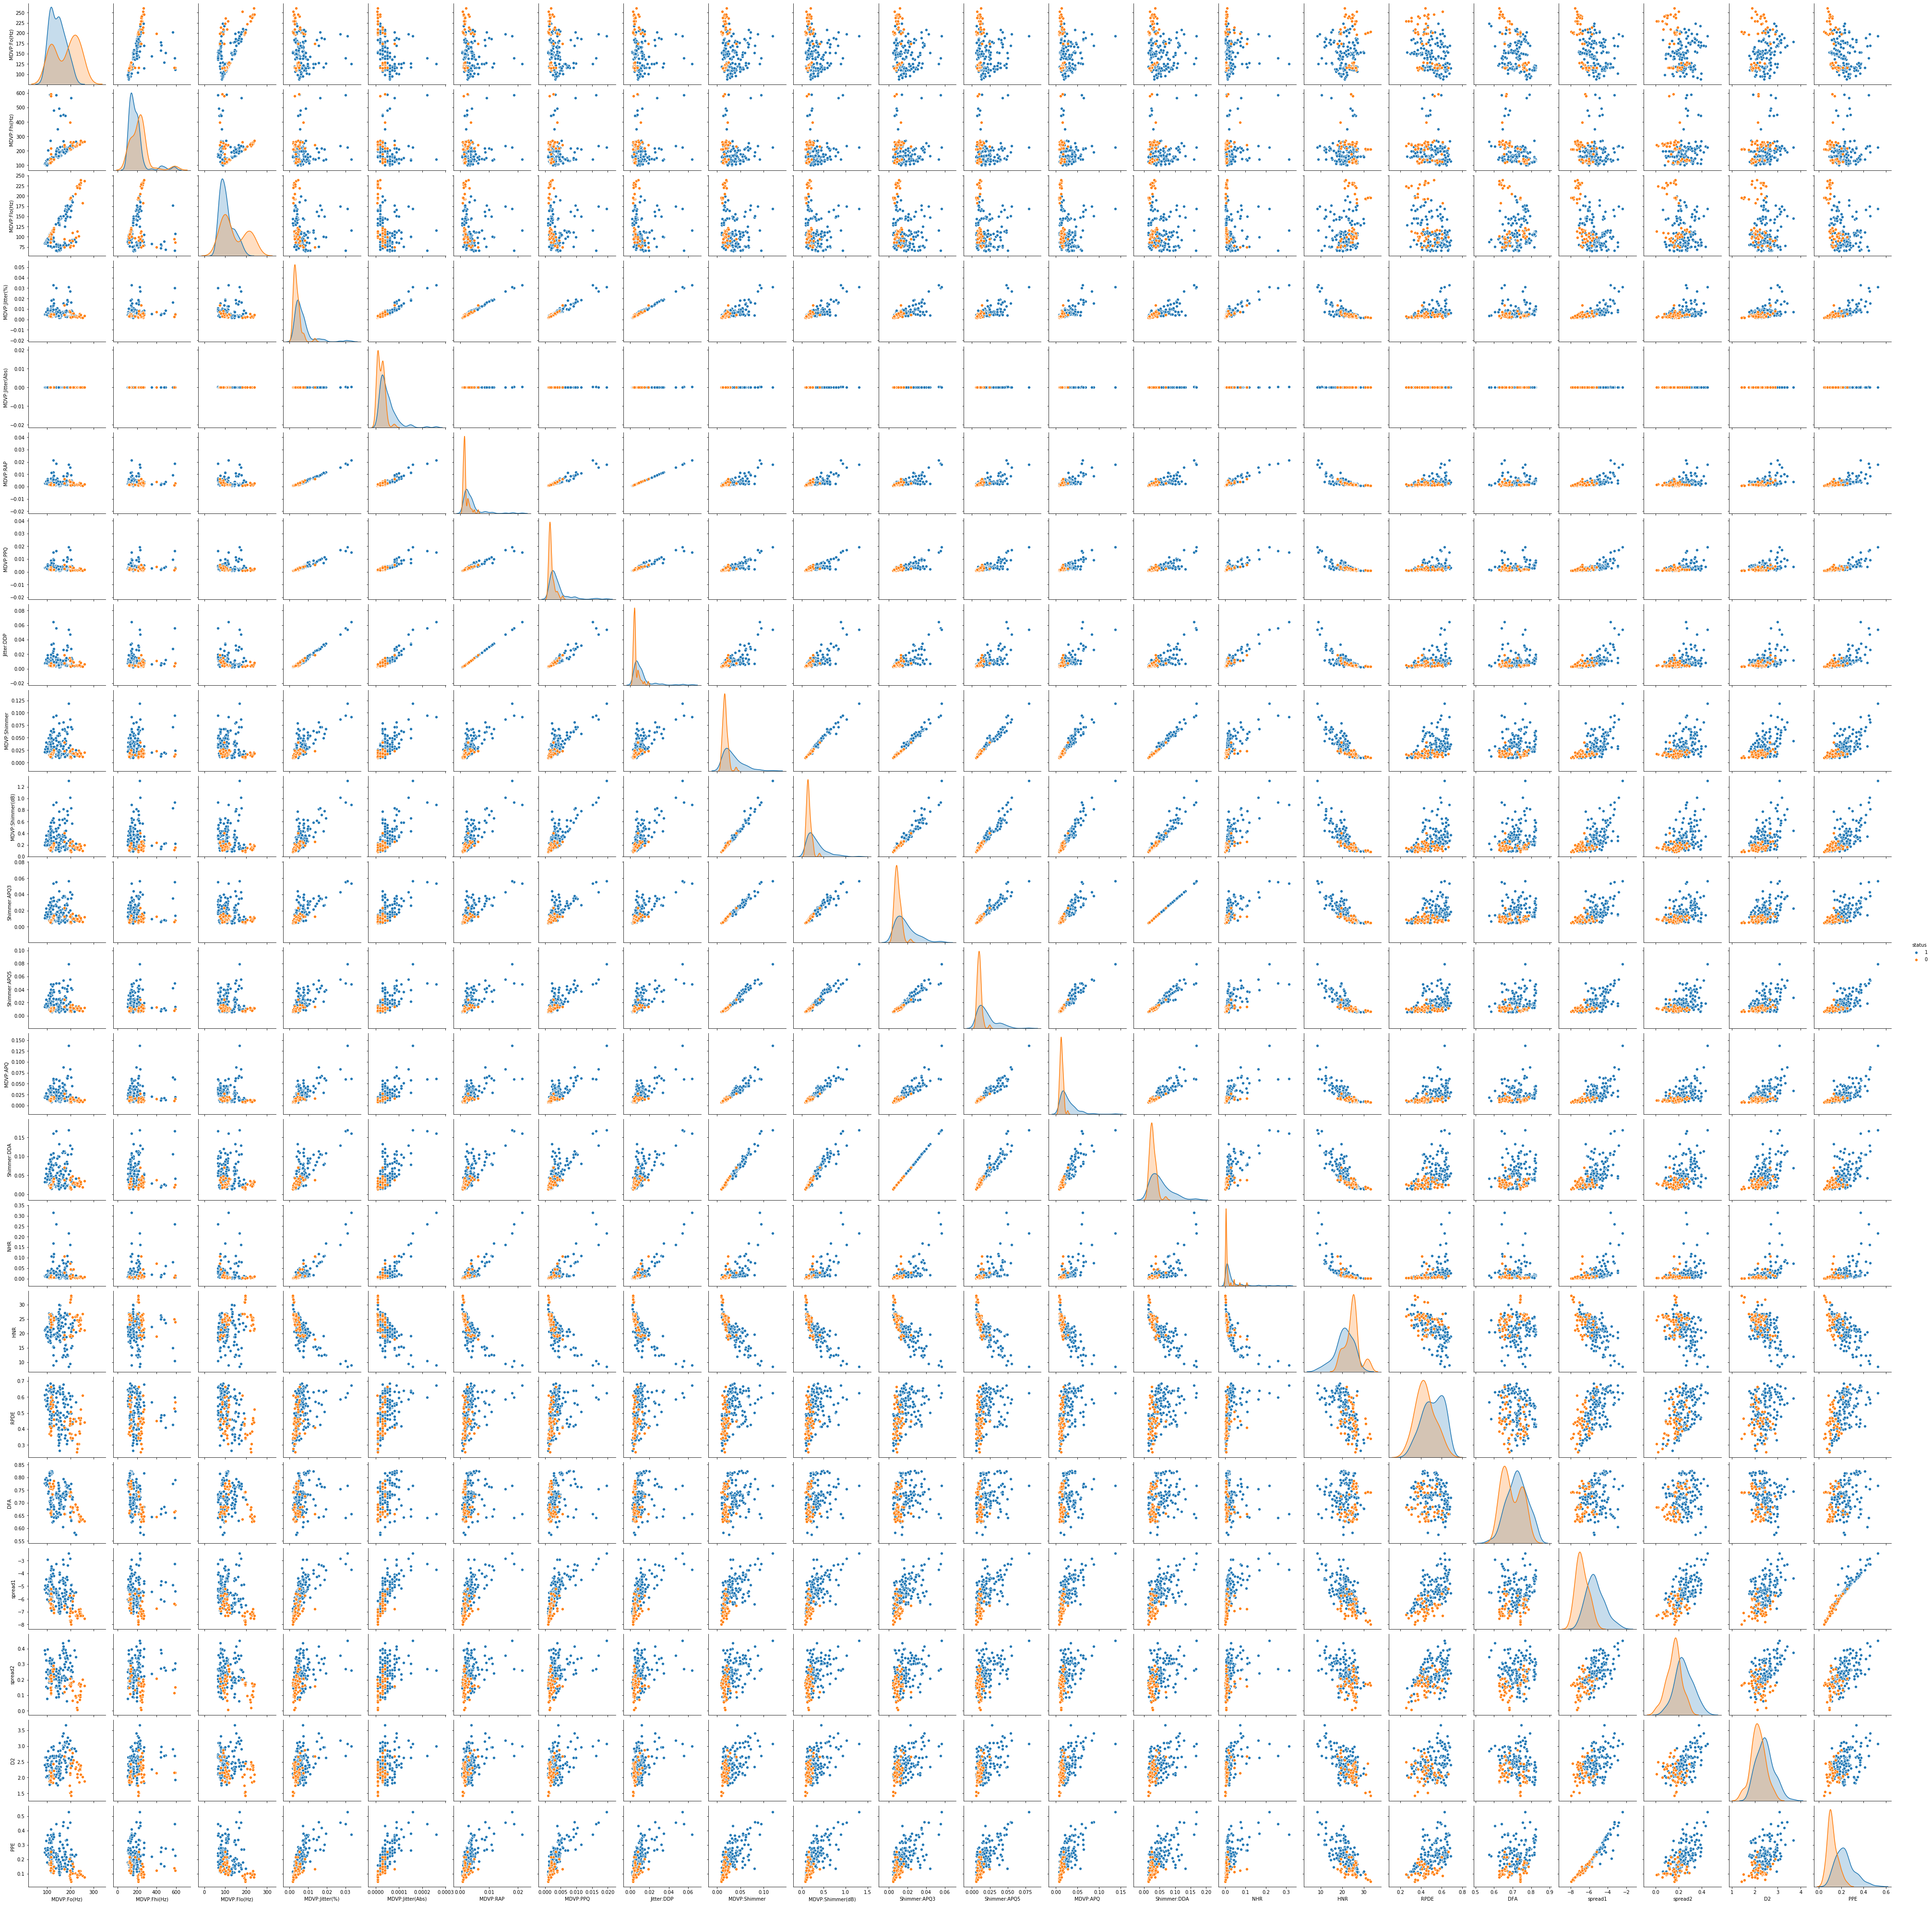

In [55]:

sns.pairplot(pats, hue='status',hue_order=[1,0]) 
#sns.pairplot(data.iloc[:,:-4], hue='Personal Loan', diag_kind='hist')


#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[10,6])

#pats.boxplot()

Very strong coorelation between Shimmer:DDA and Shimmer:APQ3. Remove one of them.

MDVP:Shimmer(dB), 

MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - all seem coorelated.
Lower combination og numbers seem to indicate people who dont have parkinson.


Maybe I should look at it after scaling it.

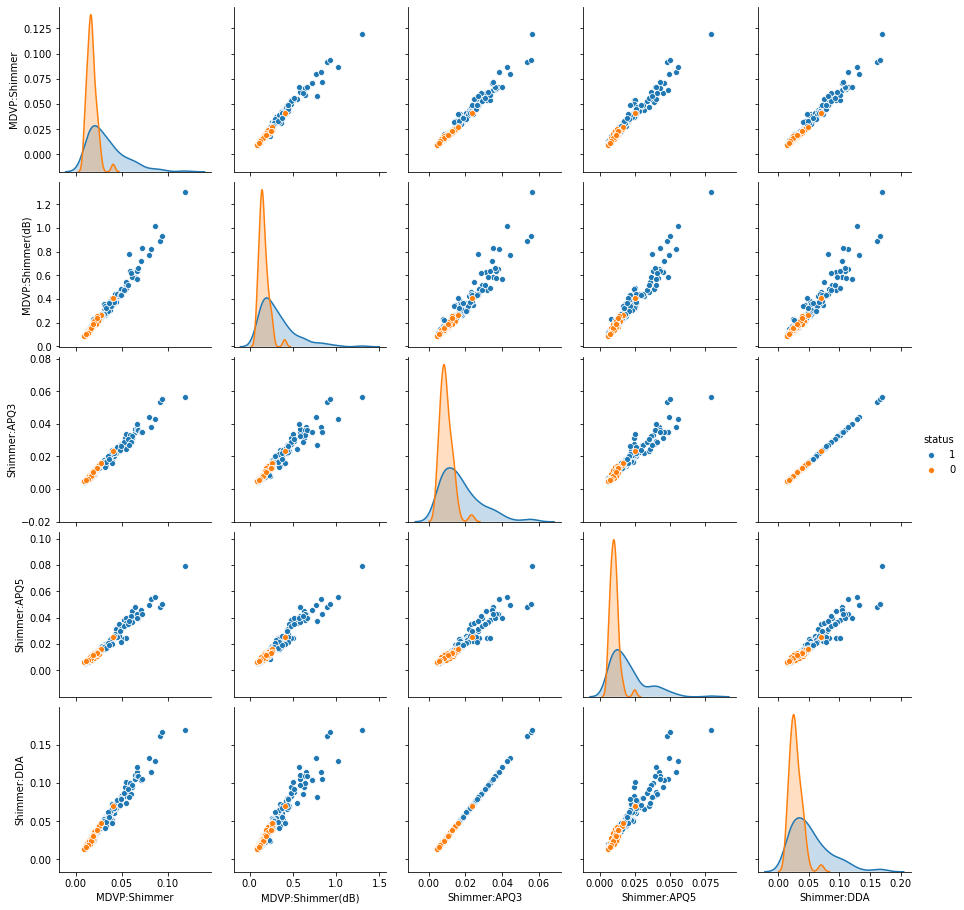

In [56]:
sns.pairplot(pats[["MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","Shimmer:DDA","status"]], hue='status',hue_order=[1,0]) 

### Observations - Shimmer ###
Exported dataframe with only shimmer variables.
Very strong coorelation between Shimmer:DDA and Shimmer:APQ3. Remove one of them.
Strong enough coorelation between all these variables - Possibly remove one of them

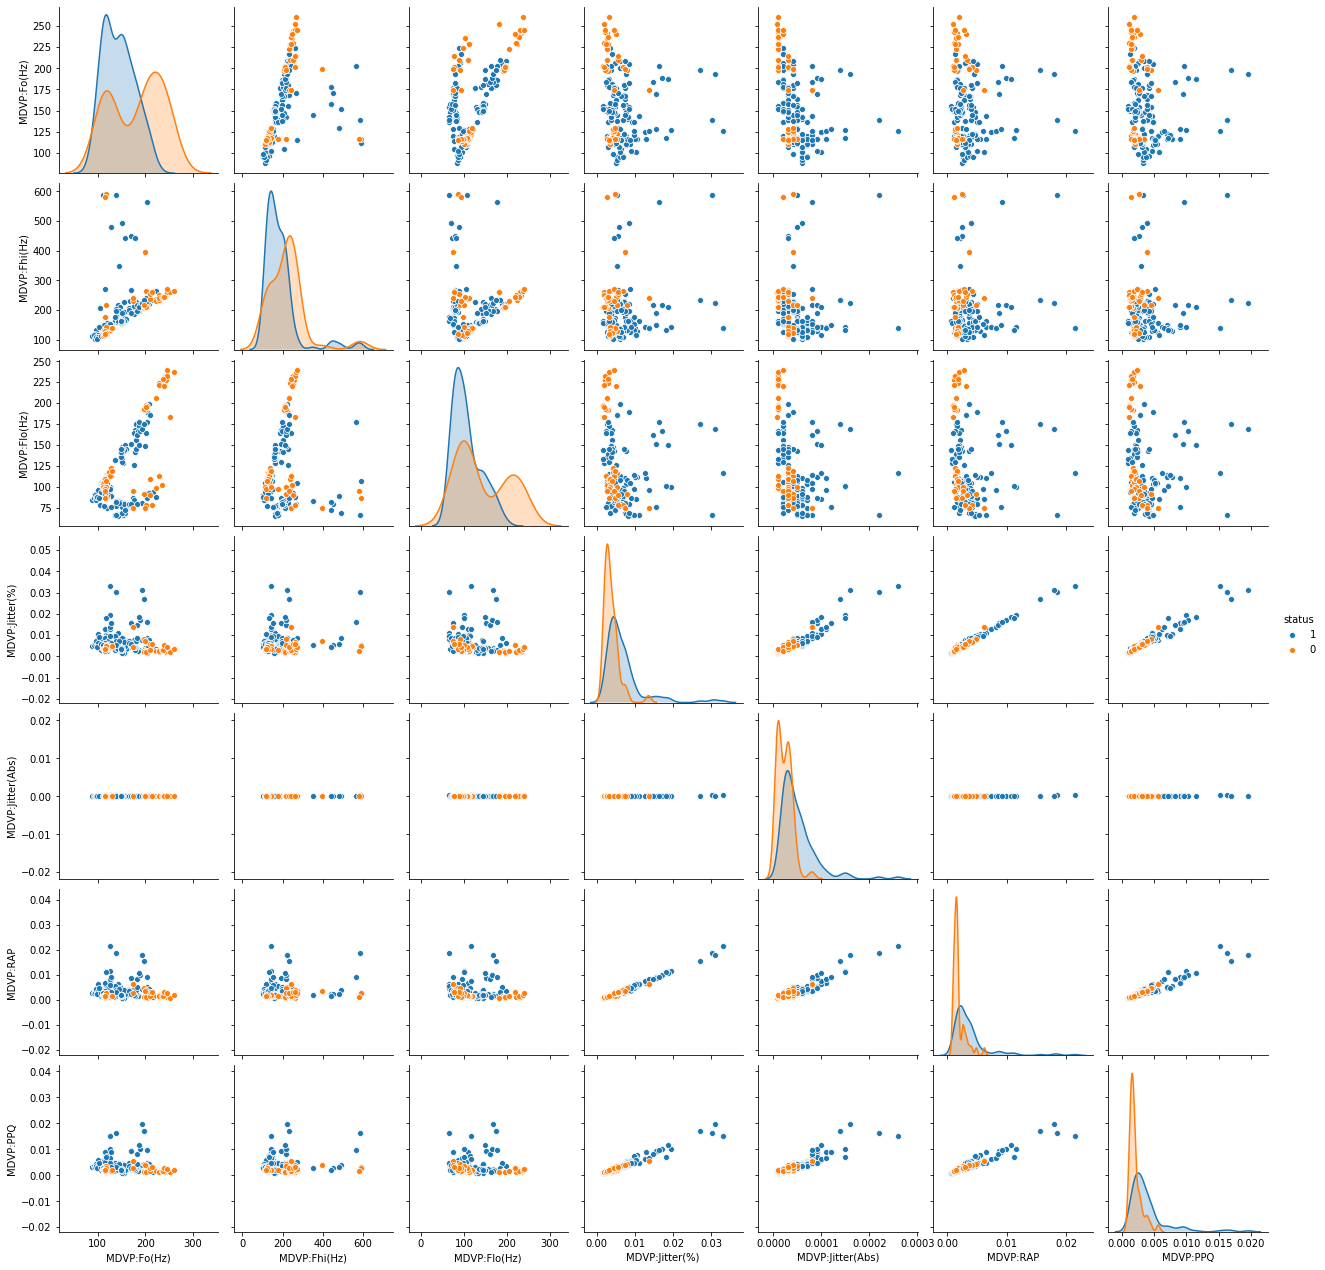

In [57]:

sns.pairplot(pats[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","status"]], hue='status',hue_order=[1,0])                          

### Observations on MDVP export ###
Possible coorelation between MDVP:RAP and MDVP:Jitter(%) - Needs more investigation.

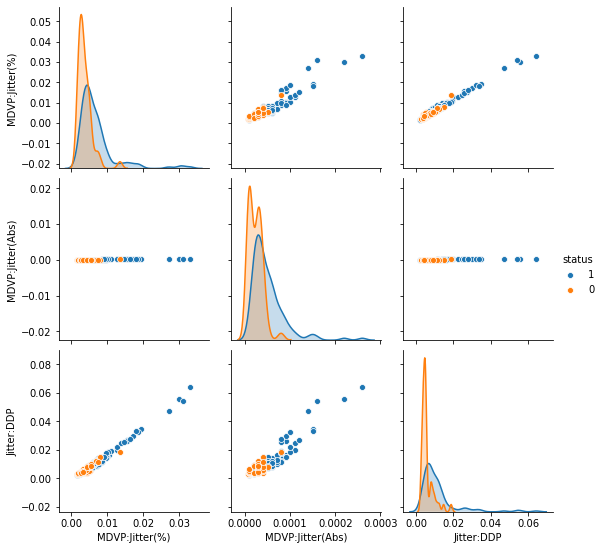

In [58]:
sns.pairplot(pats[["MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "Jitter:DDP","status"]], hue='status',hue_order=[1,0])                          

## Observations on Jitter ##
Reasonable coorelation between MDVP:Jitter(%) and Jitter:DDP.


<IPython.core.display.Javascript object>


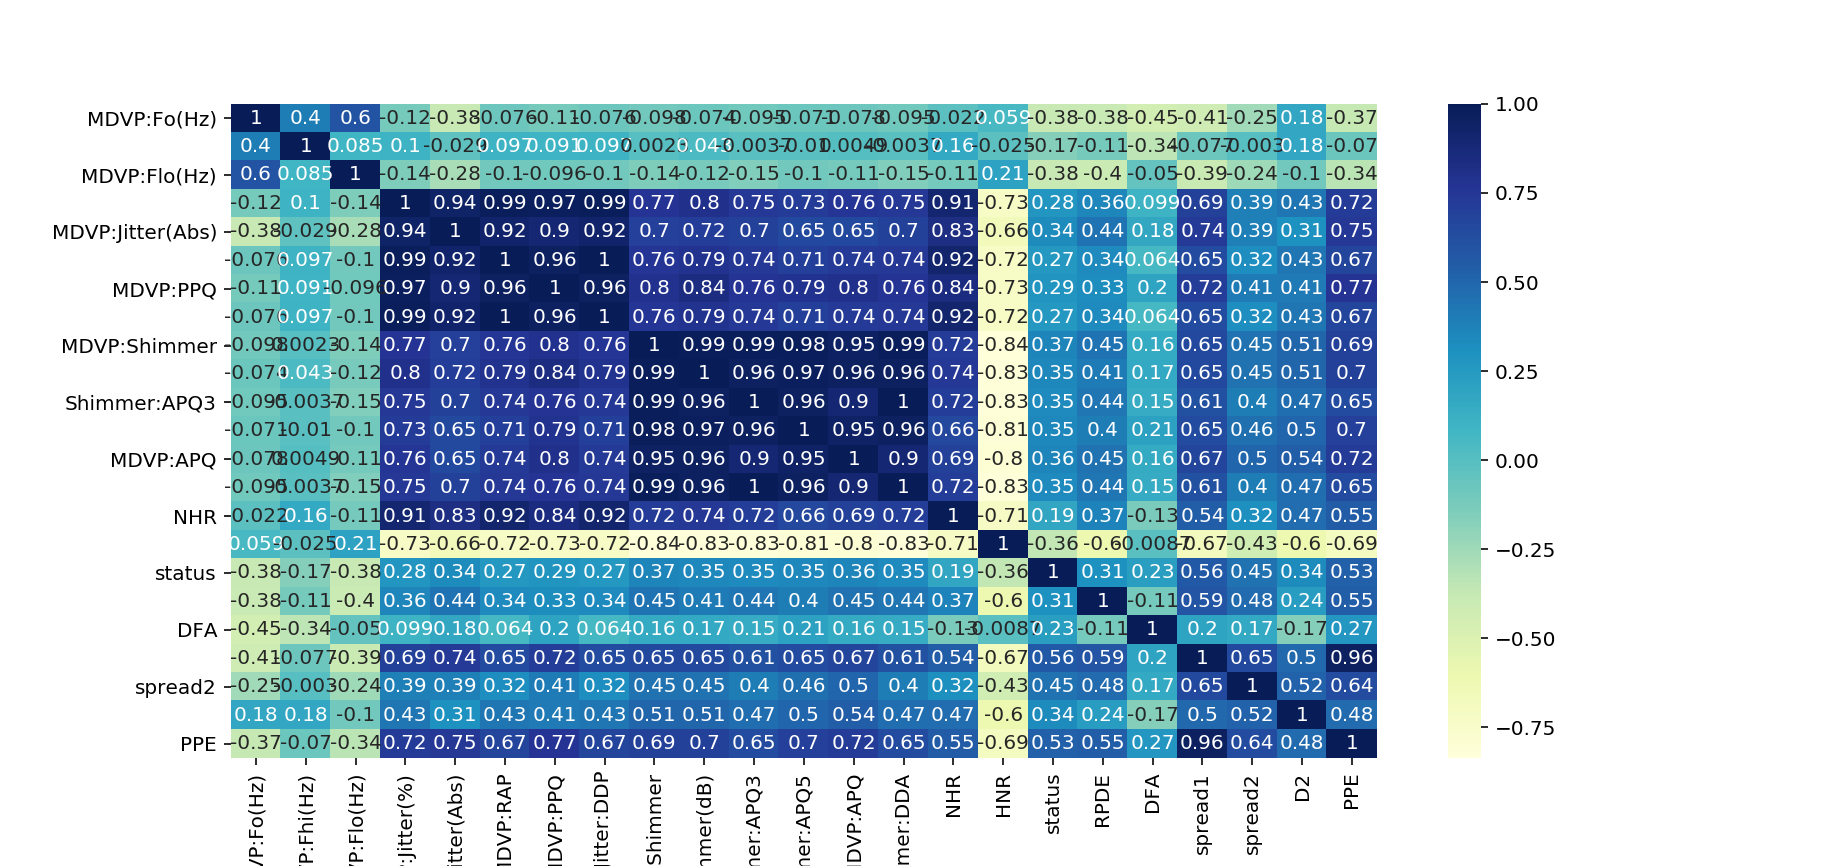

In [91]:
%matplotlib notebook
sns.heatmap(pats.corr(),annot=True,cmap='YlGnBu')

### Observations ###
‘MDVP:Shimmer’,’MDVP:Shimmer(dB)’,’Shimmer:APQ3’,’Shimmer:APQ5’, ‘Shimmer:DDA’ are highly coorelated. Need to drop all but 1. Probably keep MDVP:Shimmer(dB)

Jitter:DDP, MDVP:PPQ, MDVP:RAP, MDVP:Jitter(Abs), MDVP:Jitter(%), NHR. Need to drop all but 1. Probably keep MDVP:Jitter(%)

Spread1 and PPE. 

In [92]:
pats = pats.drop(["MDVP:Shimmer","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA"],axis=1)
pats = pats.drop(["Jitter:DDP","MDVP:PPQ","MDVP:RAP","MDVP:Jitter(Abs)","NHR","spread1"],axis=1)

In [61]:
#pats = pats.drop(["PPE"], axis=1)
#pats = pats.drop(["name"], axis=1)

In [62]:
#pats = pats.drop(["DFA"],axis=1)

In [63]:
#pats = pats.drop(["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)"], axis=1)

<IPython.core.display.Javascript object>


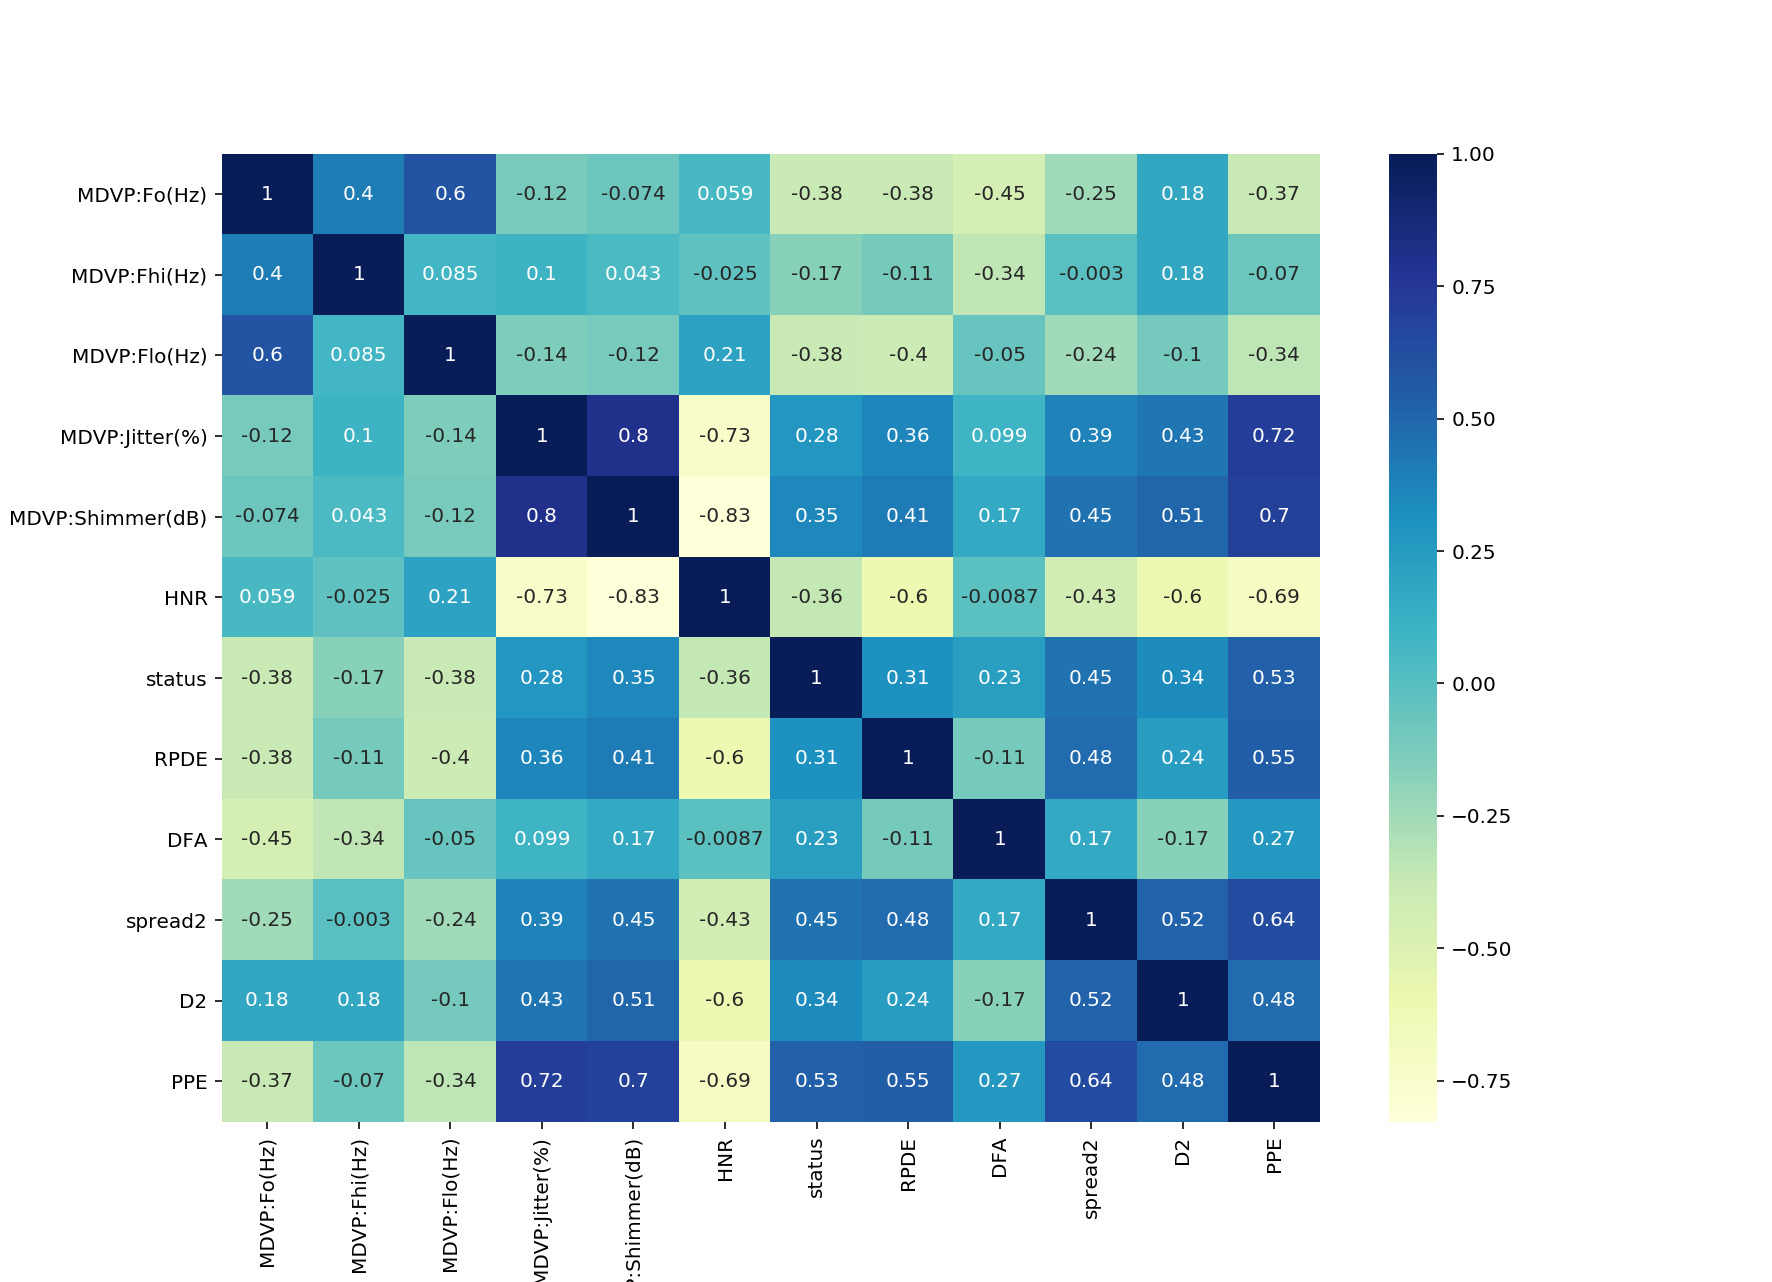

In [93]:
sns.heatmap(pats.corr(),annot=True,cmap='YlGnBu')

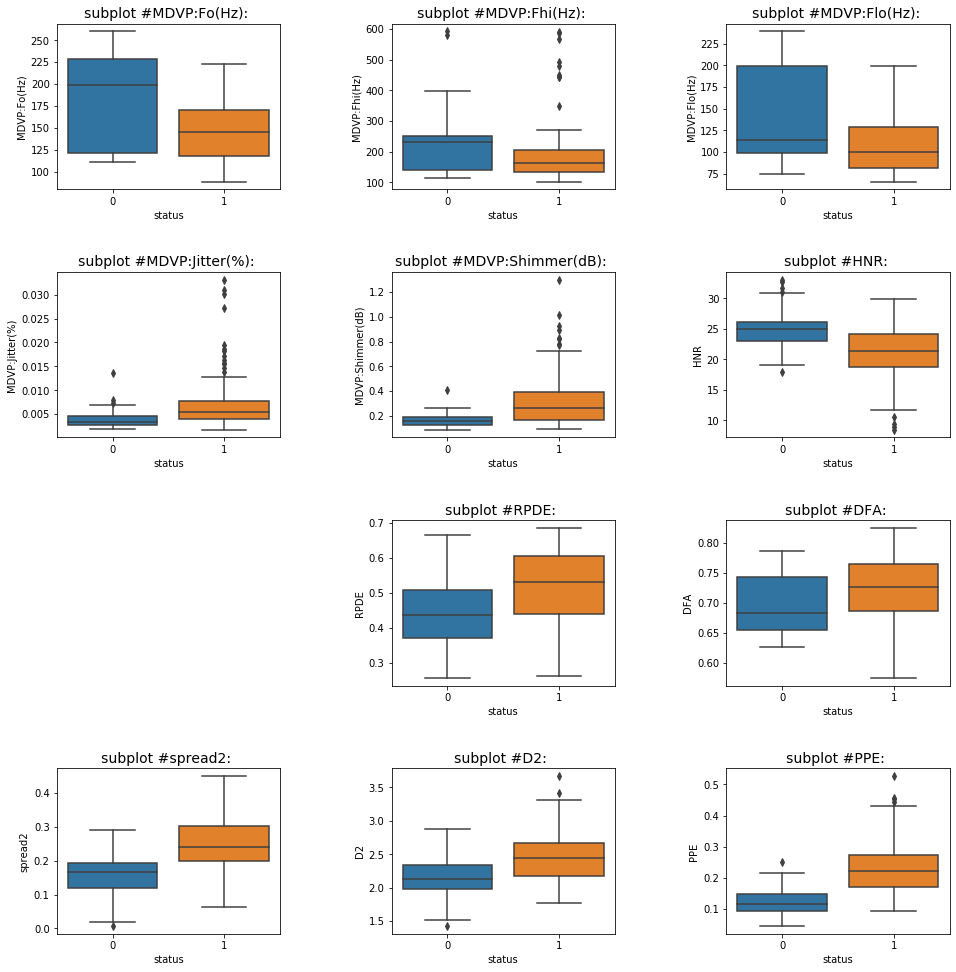

In [65]:
%matplotlib inline
fig = plt.figure(figsize=(16,35))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
#fig.tight_layout(h_pad=100.0, w_pad=100.0)
for i,cols in enumerate(pats.columns):
    if cols != 'status':
        fig.add_subplot(8,3,i+1)
        plt.title('subplot #{}: '.format(cols), fontsize=14)
        sns.boxplot(pats.status,pats[cols])

### Observations after scaling, reducing features ###
Do we need MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz) - There is a over large over lap here between those with and without Parkinsons. Would Shimmer, Jitted be a better representation of the disease?
Similarly DFA. Do we need?

In [66]:
#pats.describe().transpose()
pats.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Shimmer(dB)    float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

# Data scaling #
As mentioned previously, we need to scale data. Some are counted in one thousandths while others are in hundreds. 
I dont want to change the distribution. So will choose minmaxscaler.

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pats_scaled = scaler.fit_transform(pats)
#pats_scaled.describe.transpose()
pats_scaled = pd.DataFrame(pats_scaled,columns=pats.columns)
pats_scaled.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Shimmer(dB)    float64
HNR                 float64
status              float64
RPDE                float64
DFA                 float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [68]:
pats_scaled.describe().transpose()

count      mean       std  min       25%       50%  \
MDVP:Fo(Hz)       195.0  0.383623  0.240959  0.0  0.170220  0.351961   
MDVP:Fhi(Hz)      195.0  0.193841  0.186761  0.0  0.066786  0.150411   
MDVP:Flo(Hz)      195.0  0.292748  0.250564  0.0  0.108323  0.223606   
MDVP:Jitter(%)    195.0  0.144233  0.154007  0.0  0.056544  0.103558   
MDVP:Shimmer(dB)  195.0  0.162080  0.160129  0.0  0.052177  0.111750   
HNR               195.0  0.546410  0.179865  0.0  0.437170  0.554499   
status            195.0  0.753846  0.431878  0.0  1.000000  1.000000   
RPDE              195.0  0.564574  0.242525  0.0  0.384375  0.558550   
DFA               195.0  0.572963  0.220456  0.0  0.400291  0.589516   
spread2           195.0  0.495783  0.187758  0.0  0.378364  0.478618   
D2                195.0  0.426421  0.170294  0.0  0.300658  0.417393   
PPE               195.0  0.335549  0.186649  0.0  0.192433  0.309661   

                       75%  max  
MDVP:Fo(Hz)       0.549775  1.0  
MDVP:Fhi(Hz)      0.249162  1.0  
MDVP:Flo(Hz)      0.429160  1.0  
MDVP:Jitter(%)    0.180591  1.0  
MDVP:Shimmer(dB)  0.217749  1.0  
HNR               0.676034  1.0  
status            1.000000  1.0  
RPDE              0.772299  1.0  
DFA               0.747391  1.0  
spread2           0.614472  1.0  
D2                0.539698  1.0  
PPE               0.431709  1.0

# Train Test Split #

In [69]:
X = pats_scaled.loc[:,pats_scaled.columns != "status"]
y = pats_scaled["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=pats_scaled['status'], random_state=8)

In [70]:
### To scores of each model ####
score = pd.DataFrame(columns=["logr_score","NB Score","svc_score","dt_score","rf_score","bag_score","ada_score", "st_clf_score"])
score.loc[0] = [0,0,0,0,0,0,0,0]
print(score)

  logr_score NB Score svc_score dt_score rf_score bag_score ada_score  \
0          0        0         0        0        0         0         0   

  st_clf_score  
0            0  


# Standard Classification Methods #

I plan to use 
1. Logistic Regression
2. Naive Bayes
3. Support Vector Machines.

## Logistic Regression##

In [71]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
logr_y = logr.predict(X_test)
print("Accurance Scroe for LogisticRegression is :", logr.score(X_test,y_test))
score["logr_score"] = logr.score(X_test,y_test)

Accurance Scroe for LogisticRegression is : 0.9152542372881356


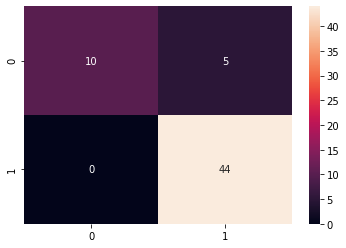

In [72]:
sns.heatmap(metrics.confusion_matrix(y_test,logr_y), annot=True)

## Naive Bayes ##

In [73]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y = nb.predict(X_test)
print("Accuracy Score for NaiveBayes is :", nb.score(X_test,y_test))
score["NB Score"] = nb.score(X_test,y_test)

Accuracy Score for NaiveBayes is : 0.847457627118644


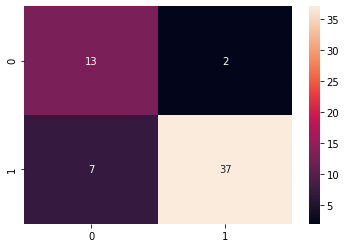

In [74]:
sns.heatmap(metrics.confusion_matrix(y_test,nb_y), annot=True)

## Support Vector ##

In [75]:
svc = SVC()
svc.fit(X_train, y_train)
svc_y = svc.predict(X_test)
print("Accuracy Score for Support Vector Machines is :", svc.score(X_test,y_test))
score["svc_score"] = svc.score(X_test,y_test)

Accuracy Score for Support Vector Machines is : 0.8983050847457628


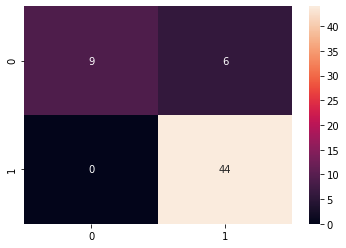

In [76]:
sns.heatmap(metrics.confusion_matrix(y_test,svc_y), annot=True)

# Stacking and Meta classifiers #
I plan to use the three learners as 
1. Randomforrest, 
2. Logistic regression and 
3. Bagging with SVC

the Final estimator (the 2nd level of processing would be with AdaBoost.



In [77]:
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', GaussianNB()),
                 ('rf_3', LogisticRegression())
                ]
st_clf = StackingClassifier(estimators=base_learners,
                         final_estimator=AdaBoostClassifier(),  
                         cv=10)
st_clf.fit(X_train, y_train)
st_y = st_clf.predict(X_test)
print("Accuracy score of Stacking is :", st_clf.score(X_test,y_test))
score["st_clf_score"] = st_clf.score(X_test,y_test)

Accuracy score of Stacking is : 0.864406779661017


# Ensemble Methods #

## Decision Tree ##

In [78]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(X_train,y_train)
dt_y = dt.predict(X_test)
print("Accurance score for Dtree wit Gini is L:", dt.score(X_test, y_test))
score["dt_score"] = dt.score(X_test, y_test)

Accurance score for Dtree wit Gini is L: 0.864406779661017


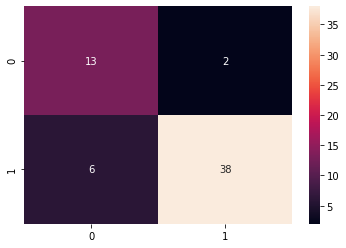

In [79]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_y), annot=True)

[Text(465.0, 792.75, 'PPE <= 0.185\ngini = 0.368\nsamples = 136\nvalue = [33, 103]\nclass = Yes'),
 Text(232.5, 566.25, 'MDVP:Fhi(Hz) <= 0.204\ngini = 0.451\nsamples = 32\nvalue = [21, 11]\nclass = No'),
 Text(116.25, 339.75, 'RPDE <= 0.472\ngini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Yes'),
 Text(58.125, 113.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = Yes'),
 Text(174.375, 113.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(348.75, 339.75, 'D2 <= 0.616\ngini = 0.1\nsamples = 19\nvalue = [18, 1]\nclass = No'),
 Text(290.625, 113.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = No'),
 Text(406.875, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(697.5, 566.25, 'HNR <= 0.712\ngini = 0.204\nsamples = 104\nvalue = [12, 92]\nclass = Yes'),
 Text(581.25, 339.75, 'MDVP:Fo(Hz) <= 0.701\ngini = 0.137\nsamples = 95\nvalue = [7, 88]\nclass = Yes'),
 Text(523.125, 113.25, 'gini = 0.103\nsamples = 92\nvalue = [5, 87]\nclass = Yes'

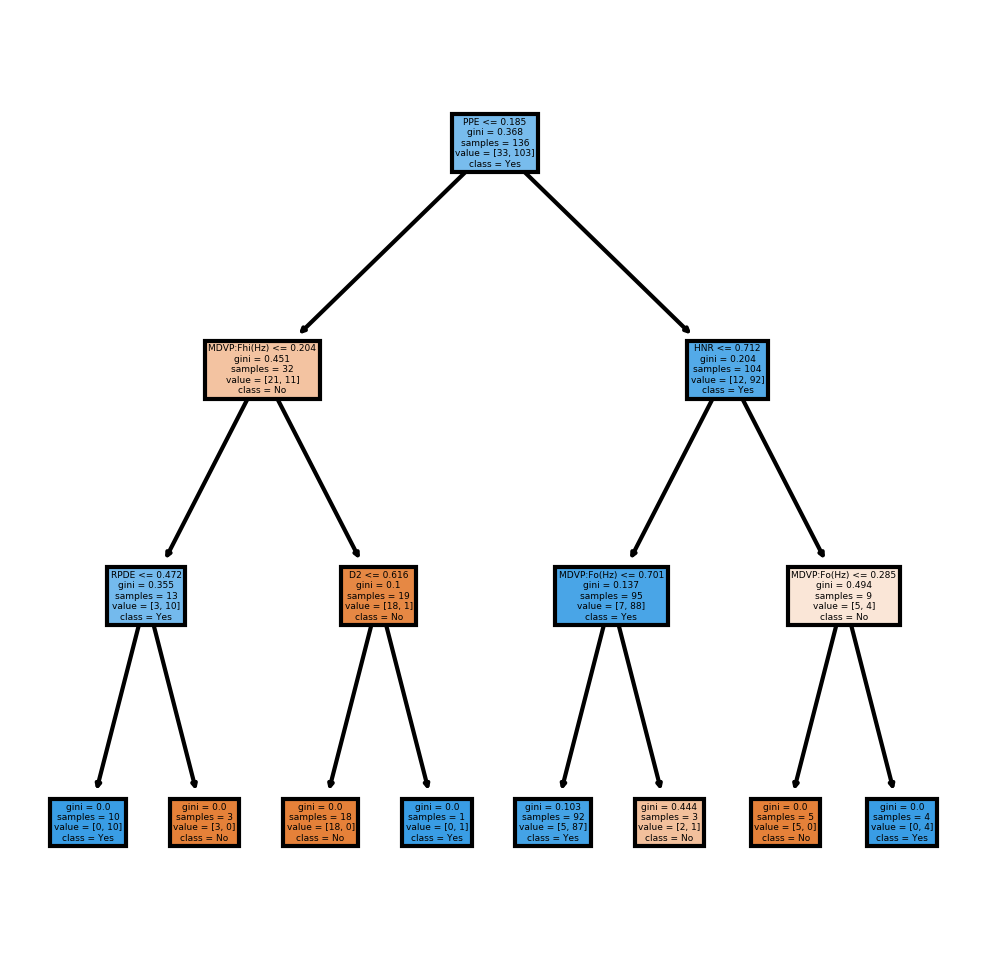

In [80]:
fn = list(X_train) ##Feature Names
cn = ['No', 'Yes'] ## Class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt, feature_names = fn, class_names=cn, filled = True)

#fig.savefig('tree.png')

## Random Forest ##

In [81]:
rf = RandomForestClassifier()##Default - n_estimators ( tree) is 100, Max features is sqrt of total features, And use Gini instead of Entropy
rf.fit(X_train,y_train)
rf_y = rf.predict(X_test)
print("Accuracy score of Random Forest is :", rf.score(X_test,y_test))
score["rf_score"] = rf.score(X_test,y_test)

Accuracy score of Random Forest is : 0.9152542372881356


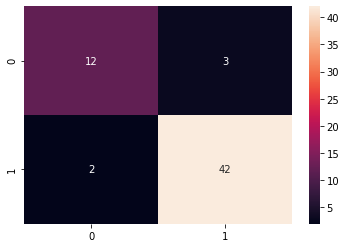

In [82]:
sns.heatmap(metrics.confusion_matrix(y_test,rf_y), annot=True)

## Bagging ##

In [83]:
bag = BaggingClassifier(base_estimator=SVC(),random_state=1)
bag.fit(X_train,y_train)
bag_y = bag.predict(X_test)
print("Accuracy score of Bagging is :", bag.score(X_test,y_test))
score["bag_score"] = bag.score(X_test,y_test)

Accuracy score of Bagging is : 0.9152542372881356


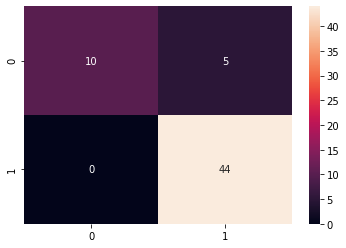

In [84]:
sns.heatmap(metrics.confusion_matrix(y_test,bag_y), annot=True)

## AdaBoast Classifier ##

In [85]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_y = ada.predict(X_test)
print("Accuracy score of AdaBoost is :", ada.score(X_test,y_test))
score["ada_score"] = ada.score(X_test,y_test)

Accuracy score of AdaBoost is : 0.8983050847457628


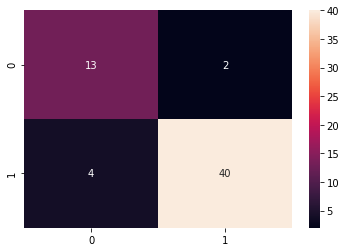

In [86]:
sns.heatmap(metrics.confusion_matrix(y_test,ada_y), annot=True)

###  Score So Far ###

In [87]:
score.transpose()

0
logr_score    0.915254
NB Score      0.847458
svc_score     0.898305
dt_score      0.864407
rf_score      0.915254
bag_score     0.915254
ada_score     0.898305
st_clf_score  0.864407

# Conclusions #
I tried multiple combinations of features. Here are the results



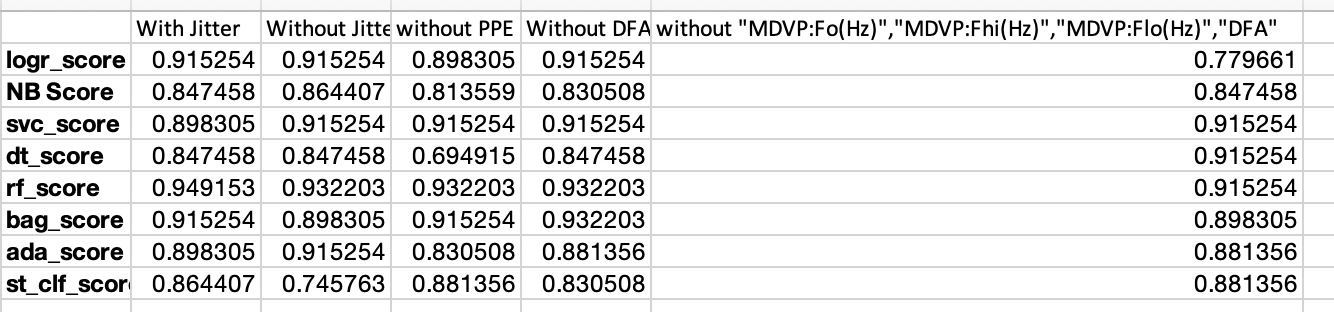

## Observations ## 
1. Naive Bayes and Decision tree are the weakest learners
2. Stacking works better with weak learner. This can be seen by checkinf the st_clf_score. Stacking uses logistic reg. Naive Bayes and SVM as the learners. The weaker the learner output, the better is the score for stacking. 
3. PPE,  MDVP Frequency measurements do add value and removing them make it reduces score of simple supervised ML algorithms.
4. The accuracy scores for learners much weaker when more features cut. The meta-classifier improves with these outputs. So for meta-classifiers, the CPU perfomance lose can somewhat be recovered by cutting more features. 
5. Random Forest is generally the best of algos. It is able to predict reasonably well even when there is a harsh cut of features.
6. Generally speaking, Bagging did better than ada boost. 
7. With a harsh cut on featurws. SVM still did well. 


## My conclusions ##
For this problem I would try and maximize the features go with logistic regression. It is the simplest and quickest. I would do this as it is fairly simple to predict the discease; of course this is because of the quality of data set.

I would use the more complicated algo like random forest when I have just enough information from the features. With just enough coorelation.

I would use meta-classifiers/stacking when the information available in the features is very vague and not very clear. This would give weak learners which can then be used to get stronger predictions from meta-classifiers.

For this problem - with so much information available in features, it makes sense to go for the simplest prediction model - Logistic regression.


